In [1]:
import glob
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('reports/hierarchical_quicknat_KORA_v5-nobn/KORA/100_*')
# files_n = glob.glob('reports/hierarchical_quicknat_NAKO_v5-nobn/NAKO/100_*')

In [3]:
files

['reports/hierarchical_quicknat_KORA_v5-nobn/KORA/100_1566016904.1315591_final_report.csv',
 'reports/hierarchical_quicknat_KORA_v5-nobn/KORA/100_1566016904.1315591_report.csv']

In [4]:
# files_n

In [5]:
def get_d(files):
    data = None
    for f in files:
        if f.split('_')[-2] == 'final':
            continue
        data = pd.read_csv(f, sep=',',header=None).values
        #data_headers = 'iou_spleen' 'iou_liver' 'iou_mean'
        #label_headers = 'dice_spleen' 'dice_liver' 'dice_mean'

    headers = data[0]
    datas = data[2:]
    d = datas[:, 7].astype('float32')
    d_l = datas[:, 8].astype('float32')
    l = datas[:, 10].astype('float32')
    l_l = datas[:, 11].astype('float32')
    return d, l, d_l, l_l

d, l, d_l, l_l = get_d(files)
# de, le = get_d(files_n)

In [6]:
train_data_points = 20
train_d, train_l = d[:train_data_points], l[:train_data_points]
test_d, test_l = d[train_data_points:], l[train_data_points:]

train_d_l, train_l_l = d_l[:train_data_points], l_l[:train_data_points]
test_d_l, test_l_l = d_l[train_data_points:], l_l[train_data_points:]

In [7]:
print(train_d.shape, train_l.shape, test_d.shape, test_l.shape)
print(train_d_l.shape, train_l_l.shape, test_d_l.shape, test_l_l.shape)

(20,) (20,) (10,) (10,)
(20,) (20,) (10,) (10,)


In [8]:
import torch.nn as nn

In [9]:

l1_s = nn.Linear(1, 2, bias=True)
l2_s = nn.Linear(2, 1, bias=True)

l1_l = nn.Linear(1, 2, bias=True)
l2_l = nn.Linear(2, 1, bias=True)

l3 = nn.Linear(3, 2, bias=True)
s = nn.Softmax()
s_l = nn.Softmax()

model_s = nn.Sequential(l1_s, l2_s)
model_l = nn.Sequential(l1_l, l2_l)

print(model_s, model_l)

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=1, bias=True)
)


In [10]:
optimizer_s = torch.optim.SGD(model_s.parameters(), lr=0.01, momentum=0.9)
optimizer_l = torch.optim.SGD(model_l.parameters(), lr=0.01, momentum=0.9)
mse = torch.nn.MSELoss()

tensor(1.2476, grad_fn=<MseLossBackward>)
tensor(1.0613, grad_fn=<MseLossBackward>)
tensor(0.8318, grad_fn=<MseLossBackward>)
tensor(0.4605, grad_fn=<MseLossBackward>)
tensor(0.1938, grad_fn=<MseLossBackward>)
tensor(0.0328, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(0.2742, grad_fn=<MseLossBackward>)
tensor(0.2040, grad_fn=<MseLossBackward>)
tensor(0.3391, grad_fn=<MseLossBackward>)
tensor(0.3950, grad_fn=<MseLossBackward>)
tensor(0.3004, grad_fn=<MseLossBackward>)
tensor(0.1811, grad_fn=<MseLossBackward>)
tensor(0.0903, grad_fn=<MseLossBackward>)
tensor(0.0197, grad_fn=<MseLossBackward>)
tensor(8.6296e-06, grad_fn=<MseLossBackward>)
tensor(0.0131, grad_fn=<MseLossBackward>)
tensor(0.0388, grad_fn=<MseLossBackward>)
tensor(0.0577, grad_fn=<MseLossBackward>)
tensor(0.0834, grad_fn=<MseLossBackward>)
tensor(0.1038, grad_fn=<MseLossBackward>)
tensor(0.0964, grad_fn=<MseLossBackward>)
tensor(0.0968, grad_fn=<MseLossBackward>)
tensor(0.0569, grad_fn=<MseLos

tensor(0.0078, grad_fn=<MseLossBackward>)
tensor(0.0072, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(1.8836e-05, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0024, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0678, grad_fn=<MseLossBackward>)
tensor(8.9181e-05, grad_fn=<MseLossBackward>)
tensor(7.7564e-06, grad_fn=<MseLossBackward>)
tensor(7.8757e-06, grad_fn=<MseLossBackward>)
tensor(0.0024, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0059, grad_fn=<MseLossBackward>)
tensor(0.0077, grad_fn=<MseLossBackward>)
tensor(0.0071, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(0.0010, gra

tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0060, grad_fn=<MseLossBackward>)
tensor(0.0060, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0007, grad_fn=<MseLossBackward>)
tensor(1.5910e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0500, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2165e-05, grad_fn=<MseLossBackward>)
tensor(4.0595e-06, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0042, grad_fn=<MseLossBackward>)
tensor(0.0059, grad_fn

tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(1.0452e-05, grad_fn=<MseLossBackward>)
tensor(2.2018e-05, grad_fn=<MseLossBackward>)
tensor(0.0347, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(8.6927e-06, grad_fn=<MseLossBackward>)
tensor(7.3392e-05, grad_fn=<MseLossBackward>)
tensor(0.0012, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(0.0027, grad_fn=<MseLossBackward>)
tensor(0.0041, grad_fn=<MseLossBackward>)
tensor(0.0048, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(5.7797e-06, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0017,

tensor(7.4985e-07, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0012, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0012, grad_fn=<MseLossBackward>)
tensor(3.4565e-05, grad_fn=<MseLossBackward>)
tensor(9.0859e-07, grad_fn=<MseLossBackward>)
tensor(0.0272, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(3.0170e-06, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0026, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0032, grad_fn=<MseLossBackward>)
tensor(0.0042, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(4.6675e-07, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0012,

tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(1.8338e-05, grad_fn=<MseLossBackward>)
tensor(0.0176, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(3.7178e-06, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0033, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(1.3844e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(2.0304e-05, grad_fn=<MseLossBackward>)
tensor(0.0172, gra

tensor(0.0012, grad_fn=<MseLossBackward>)
tensor(3.7760e-05, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(8.8817e-05, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0012, grad_fn=<MseLossBackward>)
tensor(0.0029, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(7.1951e-05, grad_fn=<MseLossBackward>)
tensor(9.5564e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0007, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(5.4002e-05, grad_fn=<MseLossBackward>)
tensor(0.0119, grad_fn=<MseLossBackward>)
tensor(0.0012, grad_fn=<MseLossBackward>)
tensor(4.1326e-05, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(7.8

tensor(1.2670e-05, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0026, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(4.2505e-05, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(6.5932e-05, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(7.3250e-05, grad_fn=<MseLossBackward>)
tensor(0.0093, grad_fn=<MseLossBackward>)
tensor(0.0012, grad_fn=<MseLossBackward>)
tensor(9.2334e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(9.2947e-06, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(6.6813e-05, grad_fn=<MseLossBackward>)
tensor(1.3836e-05, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0024, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.6259e-06, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(2.3171e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(9.0780e-05, grad_fn=<MseLossBackward>)
tensor(0.0064, grad_fn=<MseLossBackward>)
tensor(0.0012, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(2.8915e-05, grad_fn=<MseLossBackward>)
tensor(5.9059e-05, grad_fn=<MseLossBackward>)
tensor(1.0890e-05, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
te

tensor(0.0050, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0026, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(2.2995e-06, grad_fn=<MseLossBackward>)
tensor(3.7079e-06, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0023, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(7.1114e-06, grad_fn=<MseLossBackward>)
tensor(8.4289e-05, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(6.8194e-06, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(9.4074e-05, grad_fn=<MseLossBackward>)
tensor(0.0049, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(1.4329e-06, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0024, grad_fn=<MseLossBackward>)
tensor(9.2228e-05, grad_fn=<MseLossBackward>)
tensor(0.0040, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0031, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(9.9419e-06, grad_fn=<MseLossBackward>)
tensor(3.3591e-05, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(3.1721e-05, grad_fn=<MseLossBackward>)
tensor(4.7394e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(1.1921e-06, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor

tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(6.0726e-05, grad_fn=<MseLossBackward>)
tensor(2.7266e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(2.4005e-09, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0026, grad_fn=<MseLossBackward>)
tensor(8.8439e-05, grad_fn=<MseLossBackward>)
tensor(0.0034, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(4.4553e-05, grad_fn=<MseLossBackward>)
tensor(7.5114e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(6.3581e-05, grad_fn=<MseLossBackward>)
tensor(2.5835e-05, grad_fn=<MseLossBackward>)
te

tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(9.9025e-05, grad_fn=<MseLossBackward>)
tensor(1.2734e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(8.9523e-07, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0028, grad_fn=<MseLossBackward>)
tensor(8.3589e-05, grad_fn=<MseLossBackward>)
tensor(0.0029, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0007, grad_fn=<MseLossBackward>)
tensor(0.0038, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(9.5379e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0004,

tensor(2.8273e-06, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0029, grad_fn=<MseLossBackward>)
tensor(7.9219e-05, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0007, grad_fn=<MseLossBackward>)
tensor(0.0041, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(4.9098e-06, grad_fn=<MseLossBackward>)
tensor(8.5931e-05, grad_fn=<MseLossBackward>)
tensor(3.0134e-06, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0029,

tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(1.6212e-06, grad_fn=<MseLossBackward>)
tensor(7.0542e-05, grad_fn=<MseLossBackward>)
tensor(5.1886e-06, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0030, grad_fn=<MseLossBackward>)
tensor(7.5349e-05, grad_fn=<MseLossBackward>)
tensor(0.0023, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0043, grad_fn=<MseLossBackward>)
tensor(0.0006, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(1.4295e-06, grad_fn=<MseLossBackward>)
tensor(6.9344e-05, grad_fn=<MseLossBackward>)
tensor(5.3

tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0012, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(1.7889e-07, grad_fn=<MseLossBackward>)
tensor(5.7990e-05, grad_fn=<MseLossBackward>)
tensor(7.6485e-06, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0031, grad_fn=<MseLossBackward>)
tensor(7.2101e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0045, grad_fn=<MseLossBackward>)
tensor(0.0007, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0012, gra

tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(9.6892e-05, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(7.3615e-08, grad_fn=<MseLossBackward>)
tensor(4.8643e-05, grad_fn=<MseLossBackward>)
tensor(1.0035e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0032, grad_fn=<MseLossBackward>)
tensor(6.9510e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0047, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(9.5980e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(8.7129e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(7.0161e-07, grad_fn=<MseLossBackward>)
tensor(4.1589e-05, grad_fn=<MseLossBackward>)
tensor(1.2273e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0032, grad_fn=<MseLossBackward>)
tensor(6.7518e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0048, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(8.6418e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.5988e-06, grad_fn=<MseLossBackward>)
tensor(3.6592e-05, grad_fn=<MseLossBackward>)
tensor(1.4172e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0032, grad_fn=<MseLossBackward>)
tensor(6.6163e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0049, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(7.9477e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.6878e-06, grad_fn=<MseLossBackward>)
tensor(3.6

tensor(0.0033, grad_fn=<MseLossBackward>)
tensor(6.5275e-05, grad_fn=<MseLossBackward>)
tensor(0.0016, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0050, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(7.4298e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(2.6180e-06, grad_fn=<MseLossBackward>)
tensor(3.2648e-05, grad_fn=<MseLossBackward>)
tensor(1.5921e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0033, grad_fn=<MseLossBackward>)
tensor(6.5202e-05, grad_fn=<MseLossBackward>)
tensor(0.0016, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(6.9174e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(3.7484e-06, grad_fn=<MseLossBackward>)
tensor(2.9239e-05, grad_fn=<MseLossBackward>)
tensor(1.7674e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(0.0033, grad_fn=<MseLossBackward>)
tensor(6.4529e-05, grad_fn=<MseLossBackward>)
tensor(0.0016, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(6.8793e

tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(4.9082e-06, grad_fn=<MseLossBackward>)
tensor(2.6336e-05, grad_fn=<MseLossBackward>)
tensor(1.9403e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0033, grad_fn=<MseLossBackward>)
tensor(6.4164e-05, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(6.4345e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003,

tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(5.8827e-06, grad_fn=<MseLossBackward>)
tensor(2.4201e-05, grad_fn=<MseLossBackward>)
tensor(2.0871e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0034, grad_fn=<MseLossBackward>)
tensor(6.4104e-05, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(6.0936e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(5.9587e-06, grad_fn=<MseLossBackward>)
tensor(2.4038e-05, grad_fn=<MseLossBackward>)
tensor

tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(6.7508e-06, grad_fn=<MseLossBackward>)
tensor(2.2452e-05, grad_fn=<MseLossBackward>)
tensor(2.2228e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0034, grad_fn=<MseLossBackward>)
tensor(6.4269e-05, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(5.8037e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(6.8175e-06, grad_fn=<MseLossBackward>)
tensor(2.2325e-05, grad_fn=<MseLossBackward>)
tensor

tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(7.4549e-06, grad_fn=<MseLossBackward>)
tensor(2.1120e-05, grad_fn=<MseLossBackward>)
tensor(2.3392e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0034, grad_fn=<MseLossBackward>)
tensor(6.4569e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(5.5733e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(7.5136e-06, grad_fn=<MseLossBackward>)
tensor(2.1

tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(8.0232e-06, grad_fn=<MseLossBackward>)
tensor(2.0082e-05, grad_fn=<MseLossBackward>)
tensor(2.4394e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0034, grad_fn=<MseLossBackward>)
tensor(6.4957e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(5.3872e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(8.0757e-06, grad_fn=<MseLossBackward>)
tensor(1.9

tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(5.0659e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(9.0205e-06, grad_fn=<MseLossBackward>)
tensor(1.8308e-05, grad_fn=<MseLossBackward>)
tensor(2.6355e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0034, grad_fn=<MseLossBackward>)
tensor(6.6031e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0004,

tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(9.5615e-06, grad_fn=<MseLossBackward>)
tensor(1.7354e-05, grad_fn=<MseLossBackward>)
tensor(2.7580e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0034, grad_fn=<MseLossBackward>)
tensor(6.6900e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(4.8589e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(9.5991e-06, grad_fn=<MseLossBackward>)
tensor(1.7

tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.0027e-05, grad_fn=<MseLossBackward>)
tensor(1.6529e-05, grad_fn=<MseLossBackward>)
tensor(2.8754e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0034, grad_fn=<MseLossBackward>)
tensor(6.7863e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(4.6855e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.0057e-05, grad_fn=<MseLossBackward>)
tensor(1.6

tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(6.8905e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(4.5266e-05, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.0447e-05, grad_fn=<MseLossBackward>)
tensor(1.5762e-05, grad_fn=<MseLossBackward>)
tensor(2.9961e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(6.8983e

tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.0742e-05, grad_fn=<MseLossBackward>)
tensor(1.5213e-05, grad_fn=<MseLossBackward>)
tensor(3.0904e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(6.9920e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(4.3895e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.0763e-05, grad_fn=<MseLossBackward>)
tensor(1.5172e-05, grad_fn=<MseLossBackward>)
tensor

tensor(7.0743e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(4.2899e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.0981e-05, grad_fn=<MseLossBackward>)
tensor(1.4754e-05, grad_fn=<MseLossBackward>)
tensor(3.1747e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(7.0819e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(1.1158e-05, grad_fn=<MseLossBackward>)
tensor(1.4404e-05, grad_fn=<MseLossBackward>)
tensor(3.2426e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(7.1575e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(4.1945e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.1178e-05, grad_fn=<MseLossBackward>)
tensor(1.4365e-05, grad_fn=<MseLossBackward>)
tensor(3.2500e-05, grad_fn=<MseLossBackward>)
te

tensor(7.3304e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(4.0137e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.1524e-05, grad_fn=<MseLossBackward>)
tensor(1.3658e-05, grad_fn=<MseLossBackward>)
tensor(3.3983e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(7.3393e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(3.9119e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.1705e-05, grad_fn=<MseLossBackward>)
tensor(1.3270e-05, grad_fn=<MseLossBackward>)
tensor(3.4858e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(7.4463e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(3.9032e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.1896e-05, grad_fn=<MseLossBackward>)
tensor(1.2846e-05, grad_fn=<MseLossBackward>)
tensor(3.5865e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(7.5728e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(3.7886e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.1909e-05, grad_fn=<MseLossBackward>)
tensor(1.2817e-05, grad_fn=<MseLossBackward>)
tensor

tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(3.6703e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2091e-05, grad_fn=<MseLossBackward>)
tensor(1.2393e-05, grad_fn=<MseLossBackward>)
tensor(3.7006e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(7.7214e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(3.6627e

tensor(7.8433e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(3.5642e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2247e-05, grad_fn=<MseLossBackward>)
tensor(1.2023e-05, grad_fn=<MseLossBackward>)
tensor(3.7990e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(7.8528e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(8.0052e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(3.4396e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2412e-05, grad_fn=<MseLossBackward>)
tensor(1.1602e-05, grad_fn=<MseLossBackward>)
tensor(3.9179e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(8.0150e-05, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2495e-05, grad_fn=<MseLossBackward>)
tensor(1.1385e-05, grad_fn=<MseLossBackward>)
tensor(3.9804e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(8.1014e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(3.3682e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2505e-05, grad_fn=<MseLossBackward>)
tensor(1.1

tensor(1.2658e-05, grad_fn=<MseLossBackward>)
tensor(1.0936e-05, grad_fn=<MseLossBackward>)
tensor(4.1179e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(8.2969e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0008, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(3.2305e-05, grad_fn=<MseLossBackward>)
tensor(0.0020, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2666e-05, grad_fn=<MseLossBackward>)
tensor(1.0914e-05, grad_fn=<MseLossBackward>)
tensor(4.1249e-05, grad_fn=<MseLossBackward>)
te

tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2762e-05, grad_fn=<MseLossBackward>)
tensor(1.0638e-05, grad_fn=<MseLossBackward>)
tensor(4.2132e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0035, grad_fn=<MseLossBackward>)
tensor(8.4338e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(3.1374e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015,

tensor(1.0354e-05, grad_fn=<MseLossBackward>)
tensor(4.3084e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(8.5734e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(3.0464e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2861e-05, grad_fn=<MseLossBackward>)
tensor(1.0334e-05, grad_fn=<MseLossBackward>)
tensor(4.3152e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor

tensor(8.6837e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.9770e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2927e-05, grad_fn=<MseLossBackward>)
tensor(1.0120e-05, grad_fn=<MseLossBackward>)
tensor(4.3893e-05, grad_fn=<MseLossBackward>)
tensor(9.8904e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(8.6931e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor

tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.8786e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0015, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3015e-05, grad_fn=<MseLossBackward>)
tensor(9.8239e-06, grad_fn=<MseLossBackward>)
tensor(4.4958e-05, grad_fn=<MseLossBackward>)
tensor(9.7079e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(8.8547e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3113e-05, grad_fn=<MseLossBackward>)
tensor(9.4567e-06, grad_fn=<MseLossBackward>)
tensor(4.6351e-05, grad_fn=<MseLossBackward>)
tensor(9.4747e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(9.0686e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.7473e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(9.2402e-06, grad_fn=<MseLossBackward>)
tensor(4.7202e-05, grad_fn=<MseLossBackward>)
tensor(9.3342e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(9.2020e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.6726e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3169e-05, grad_fn=<MseLossBackward>)
tensor(9.2236e-06, grad_fn=<MseLossBackward>)
tensor(4.7269e-05, grad_fn=<MseLossBackward>)
tensor(9.3228e-05, grad_fn=<MseLossBackward>

tensor(1.3211e-05, grad_fn=<MseLossBackward>)
tensor(9.0320e-06, grad_fn=<MseLossBackward>)
tensor(4.8048e-05, grad_fn=<MseLossBackward>)
tensor(9.1960e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(9.3361e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.5996e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3213e-05, grad_fn=<MseLossBackward>)
tensor(9.0166e-06, grad_fn=<MseLossBackward>)
tensor(4.8114e-05, grad_fn=<MseLossBackward>

tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.5228e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3256e-05, grad_fn=<MseLossBackward>)
tensor(8.8024e-06, grad_fn=<MseLossBackward>)
tensor(4.9016e-05, grad_fn=<MseLossBackward>)
tensor(9.0405e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(9.4917e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(8.6408e-06, grad_fn=<MseLossBackward>)
tensor(4.9722e-05, grad_fn=<MseLossBackward>)
tensor(8.9284e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(9.6068e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.4584e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3285e-05, grad_fn=<MseLossBackward>)
tensor(8.6268e-06, grad_fn=<MseLossBackward>)
tensor(4.9789e-05, grad_fn=<MseLossBackward>)
tensor(8.9178e-05, grad_fn=<MseLossBackward>

tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.3749e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3320e-05, grad_fn=<MseLossBackward>)
tensor(8.4003e-06, grad_fn=<MseLossBackward>)
tensor(5.0806e-05, grad_fn=<MseLossBackward>)
tensor(8.7589e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(9.7848e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.3195e-05, grad_fn=<MseLossBackward>)
tensor(0.0019, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3337e-05, grad_fn=<MseLossBackward>)
tensor(8.2541e-06, grad_fn=<MseLossBackward>)
tensor(5.1494e-05, grad_fn=<MseLossBackward>)
tensor(8.6519e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(9.9005e-05, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.3144e-05, grad_fn=<MseLossBackward>)
tensor

tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.2499e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3353e-05, grad_fn=<MseLossBackward>)
tensor(8.0726e-06, grad_fn=<MseLossBackward>)
tensor(5.2368e-05, grad_fn=<MseLossBackward>)
tensor(8.5178e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005,

tensor(7.9243e-06, grad_fn=<MseLossBackward>)
tensor(5.3108e-05, grad_fn=<MseLossBackward>)
tensor(8.4052e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.1869e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3361e-05, grad_fn=<MseLossBackward>)
tensor(7.9115e-06, grad_fn=<MseLossBackward>)
tensor(5.3172e-05, grad_fn=<MseLossBackward>)
tensor(8.3959e-05, grad_fn=<MseLossBackward>)
te

tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3365e-05, grad_fn=<MseLossBackward>)
tensor(7.7916e-06, grad_fn=<MseLossBackward>)
tensor(5.3786e-05, grad_fn=<MseLossBackward>)
tensor(8.3038e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.1348e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003,

tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3366e-05, grad_fn=<MseLossBackward>)
tensor(7.6756e-06, grad_fn=<MseLossBackward>)
tensor(5.4393e-05, grad_fn=<MseLossBackward>)
tensor(8.2129e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.0883e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3366e

tensor(7.5512e-06, grad_fn=<MseLossBackward>)
tensor(5.5059e-05, grad_fn=<MseLossBackward>)
tensor(8.1147e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(2.0384e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3364e-05, grad_fn=<MseLossBackward>)
tensor(7.5398e-06, grad_fn=<MseLossBackward>)
tensor(5.5121e-05, grad_fn=<MseLossBackward>)
tensor(8.1059e-05, grad_fn=<MseLossBackward>)
te

tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.9939e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3357e-05, grad_fn=<MseLossBackward>)
tensor(7.4318e-06, grad_fn=<MseLossBackward>)
tensor(5.5717e-05, grad_fn=<MseLossBackward>)
tensor(8.0181e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052,

tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3348e-05, grad_fn=<MseLossBackward>)
tensor(7.3159e-06, grad_fn=<MseLossBackward>)
tensor(5.6375e-05, grad_fn=<MseLossBackward>)
tensor(7.9229e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0036, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0011, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.9414e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3347e-05, grad_fn=<MseLossBackward>)
tensor(7.3063e-06, grad_fn=<MseLossBackward>)
tensor

tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.8526e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3318e-05, grad_fn=<MseLossBackward>)
tensor(7.0983e-06, grad_fn=<MseLossBackward>)
tensor(5.7666e-05, grad_fn=<MseLossBackward>)
tensor(7.7377e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.8484e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(1.8034e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(9.9933e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3294e-05, grad_fn=<MseLossBackward>)
tensor(6.9863e-06, grad_fn=<MseLossBackward>)
tensor(5.8355e-05, grad_fn=<MseLossBackward>)
tensor(7.6399e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.7995e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(9.9810e-05, grad_fn=<MseLossBackward>)
te

tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.7514e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(9.8358e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3267e-05, grad_fn=<MseLossBackward>)
tensor(6.8677e-06, grad_fn=<MseLossBackward>)
tensor(5.9102e-05, grad_fn=<MseLossBackward>)
tensor(7.5348e-05, grad_fn=<MseLossBackward>)
tensor(0.0002, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.7477e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor

tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.7009e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(9.6797e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3233e-05, grad_fn=<MseLossBackward>)
tensor(6.7573e-06, grad_fn=<MseLossBackward>)
tensor(5.9836e-05, grad_fn=<MseLossBackward>)
tensor(7.4323e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.6550e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(9.5376e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3199e-05, grad_fn=<MseLossBackward>)
tensor(6.6569e-06, grad_fn=<MseLossBackward>)
tensor(6.0506e-05, grad_fn=<MseLossBackward>)
tensor(7.3392e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3173e-05, grad_fn=<MseLossBackward>)
tensor(6.5833e-06, grad_fn=<MseLossBackward>)
tensor(6.1011e-05, grad_fn=<MseLossBackward>)
tensor(7.2707e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.6179e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(9.4207e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3170e-05, grad_fn=<MseLossBackward>)
tensor(6.5757e-06, grad_fn=<MseLossBackward>)
te

tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.5742e-05, grad_fn=<MseLossBackward>)
tensor(0.0018, grad_fn=<MseLossBackward>)
tensor(9.2815e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3131e-05, grad_fn=<MseLossBackward>)
tensor(6.4834e-06, grad_fn=<MseLossBackward>)
tensor(6.1724e-05, grad_fn=<MseLossBackward>)
tensor(7.1738e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.5706e-05, grad_fn=<MseLossBackward>)
tensor

tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3072e-05, grad_fn=<MseLossBackward>)
tensor(6.3746e-06, grad_fn=<MseLossBackward>)
tensor(6.2535e-05, grad_fn=<MseLossBackward>)
tensor(7.0638e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.5175e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(9.0986e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3069e-05, grad_fn=<MseLossBackward>)
tensor

tensor(6.9918e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.4828e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(8.9850e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.3031e-05, grad_fn=<MseLossBackward>)
tensor(6.2954e-06, grad_fn=<MseLossBackward>)
tensor(6.3129e-05, grad_fn=<MseLossBackward>)
tensor(6.9844e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor

tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.4455e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(8.8629e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2983e-05, grad_fn=<MseLossBackward>)
tensor(6.2217e-06, grad_fn=<MseLossBackward>)
tensor(6.3708e-05, grad_fn=<MseLossBackward>)
tensor(6.9065e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.4124e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(8.7522e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2939e-05, grad_fn=<MseLossBackward>)
tensor(6.1568e-06, grad_fn=<MseLossBackward>)
tensor(6.4233e-05, grad_fn=<MseLossBackward>)
tensor(6.8374e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.3575e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(8.5669e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2860e-05, grad_fn=<MseLossBackward>)
tensor(6.0507e-06, grad_fn=<MseLossBackward>)
tensor(6.5114e-05, grad_fn=<MseLossBackward>)
tensor(6.7214e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0

tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2815e-05, grad_fn=<MseLossBackward>)
tensor(5.9963e-06, grad_fn=<MseLossBackward>)
tensor(6.5578e-05, grad_fn=<MseLossBackward>)
tensor(6.6614e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.3261e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(8.4594e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2

tensor(1.2712e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(8.2688e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2716e-05, grad_fn=<MseLossBackward>)
tensor(5.8900e-06, grad_fn=<MseLossBackward>)
tensor(6.6535e-05, grad_fn=<MseLossBackward>)
tensor(6.5369e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.2680e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(8.2586e-05, grad_fn=<MseLossBackward>)
te

tensor(6.4608e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.2326e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(8.1332e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2644e-05, grad_fn=<MseLossBackward>)
tensor(5.8210e-06, grad_fn=<MseLossBackward>)
tensor(6.7179e-05, grad_fn=<MseLossBackward>)
tensor(6.4544e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor

tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0051, grad_fn=<MseLossBackward>)
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(1.1952e-05, grad_fn=<MseLossBackward>)
tensor(0.0017, grad_fn=<MseLossBackward>)
tensor(8.0001e-05, grad_fn=<MseLossBackward>)
tensor(0.0004, grad_fn=<MseLossBackward>)
tensor(0.0013, grad_fn=<MseLossBackward>)
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(1.2569e-05, grad_fn=<MseLossBackward>)
tensor(5.7559e-06, grad_fn=<MseLossBackward>)
tensor(6.7813e-05, grad_fn=<MseLossBackward>)
tensor(6.3734e-05, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0037, grad_fn=<MseLossBackward>)
tensor(0.0001, grad_fn=<MseLossBackward>)
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0

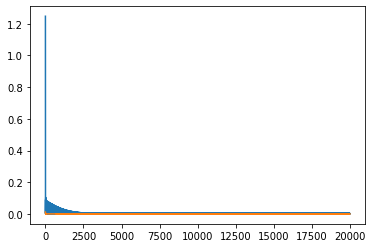

In [11]:
loss_ = []
loss_l_ = []
previous_loss = 100
model_ = None
for e in range(1000):
    for i, (d_, l_) in enumerate(zip(torch.from_numpy(train_d).type(torch.FloatTensor), torch.from_numpy(train_l).type(torch.FloatTensor))):
        optimizer_s.zero_grad()
        output = model_s(d_.reshape(1, -1))
        loss = mse(output, l_)
#         if loss < previous_loss:
#             print(e, i, loss, previous_loss)
#             #model_ = model
#             previous_loss = loss
        loss_.append(loss.item())
        print(loss)
        loss.backward()
        optimizer_s.step()

for e in range(1000):
    for i, (d_l, l_l) in enumerate(zip(torch.from_numpy(train_d_l).type(torch.FloatTensor), torch.from_numpy(train_l_l).type(torch.FloatTensor))):
        optimizer_l.zero_grad()
        output_l = model_l(d_l.reshape(1, -1))
        loss_l = mse(output_l, l_l)
#         if loss < previous_loss:
#             print(e, i, loss, previous_loss)
#             #model_ = model
#             previous_loss = loss
        loss_l_.append(loss_l.item())
        #print(loss)
        loss_l.backward()
        optimizer_l.step()

        
plt.plot(range(len(loss_)), loss_)
plt.plot(range(len(loss_l_)), loss_l_)
plt.show()
#model = model_

In [16]:
next(model_s.parameters())


Parameter containing:
tensor([[0.5859],
        [1.1291]], requires_grad=True)

In [17]:
next(model_l.parameters())

Parameter containing:
tensor([[0.7254],
        [0.5305]], requires_grad=True)

In [18]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    print('...............................')
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin
#     print(leftSpan, rightSpan)
    # Convert the left range into a 0-1 range (float)
    valueScaled = value - leftMin 
#     print(valueScaled)
    valueScaled = valueScaled / leftSpan
#     print(valueScaled)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

In [19]:
p = []
p_bounded = []
p_l_ = []
p_bounded_l = []
lower_bound = torch.from_numpy(np.array([0])).type(torch.FloatTensor)
p_lower = model_s.forward(lower_bound)
p_lower_l = model_l.forward(lower_bound)
print([0,0, 0], None, p_lower, p_lower_l)

upper_bound = torch.from_numpy(np.array([1])).type(torch.FloatTensor)
p_upper = model_s.forward(upper_bound)
p_upper_l = model_l.forward(upper_bound)
print([1,1, 1], None, p_upper, p_upper_l)
for d_, l_ in zip(torch.from_numpy(test_d).type(torch.FloatTensor), torch.from_numpy(test_l).type(torch.FloatTensor)):
    #print(d_, l_)
    p_ = model_s.forward(d_.reshape(1, -1))
    p__ = translate(p_,  p_lower, p_upper, torch.from_numpy(np.array([0])).type(torch.FloatTensor), torch.from_numpy(np.array([1])).type(torch.FloatTensor))
    p.append(p_.detach().numpy())
    p_bounded.append(p__.detach().numpy())
    print(d_, l_, p_, p__)
#     break

for d_, l_ in zip(torch.from_numpy(test_d_l).type(torch.FloatTensor), torch.from_numpy(test_l_l).type(torch.FloatTensor)):
    #print(d_, l_)
    p_l = model_l.forward(d_.reshape(1, -1))
    p__l = translate(p_l,  p_lower_l, p_upper_l, torch.from_numpy(np.array([0])).type(torch.FloatTensor), torch.from_numpy(np.array([1])).type(torch.FloatTensor))
    p_l_.append(p_l.detach().numpy())
    p_bounded_l.append(p__l.detach().numpy())
    print(d_, l_, p_l, p__l)
#     break
   
p = np.asarray(p)
p_l_ = np.asarray(p_l_)
rmse_loss_metric = mse(torch.from_numpy(test_l), torch.from_numpy(p))
rmse_loss_metric_l = mse(torch.from_numpy(test_l_l), torch.from_numpy(p_l_))
p_bounded = np.asarray(p_bounded)
p_bounded_l = np.asarray(p_bounded_l)
rmse_loss_metric_bounded = mse(torch.from_numpy(test_l), torch.from_numpy(p_bounded))
rmse_loss_metric_bounded_l = mse(torch.from_numpy(test_l_l), torch.from_numpy(p_bounded_l))
print(rmse_loss_metric, rmse_loss_metric_bounded, rmse_loss_metric_l, rmse_loss_metric_bounded_l)
     

[0, 0, 0] None tensor([-0.3809], grad_fn=<AddBackward0>) tensor([0.3683], grad_fn=<AddBackward0>)
[1, 1, 1] None tensor([0.9802], grad_fn=<AddBackward0>) tensor([0.9738], grad_fn=<AddBackward0>)
...............................
tensor(0.9476) tensor(0.8917) tensor([[0.9088]], grad_fn=<AddmmBackward>) tensor([[0.9476]], grad_fn=<AddBackward0>)
...............................
tensor(0.9024) tensor(0.8958) tensor([[0.8473]], grad_fn=<AddmmBackward>) tensor([[0.9024]], grad_fn=<AddBackward0>)
...............................
tensor(0.6745) tensor(0.5021) tensor([[0.5371]], grad_fn=<AddmmBackward>) tensor([[0.6745]], grad_fn=<AddBackward0>)
...............................
tensor(0.9646) tensor(0.9417) tensor([[0.9320]], grad_fn=<AddmmBackward>) tensor([[0.9646]], grad_fn=<AddBackward0>)
...............................
tensor(0.9153) tensor(0.9192) tensor([[0.8648]], grad_fn=<AddmmBackward>) tensor([[0.9153]], grad_fn=<AddBackward0>)
...............................
tensor(0.9506) tensor(0.9258

In [ ]:
tensor(0.0092)(lower-upper to 01), tensor(0.0057)(normal), tensor(0.0052)(01 to lower-upper)

In [ ]:
# Softmax, batchnorm does not work.
# conv1d does not work
# multi layer does not improve
# remaping outputs does not help much
# saving good models does not help.
# Train as long as possible and save the model with model remember the train data(data overfitting) - very helpful in our case literally.
# use single layer as we want to know weights for particular inputs to get into output
# more data, better result
# more input features, better result(hypothesis)
# more epochs with output remap gives better result (maybe sometimes, need more expt) --> with much more epochs with data overfitting, normal prediction gives better result than prediction remapping.